# Sprint 18, Task 1

## Level 1

### Exercise 1

Create a NoSQL database using MongoDB. Add some example data to show that you are able to process some basic data.

### Exercise 2

Connect the NoSQL database to Python using for example pymongo:

In [1]:
import pymongo

In [2]:
# We first download a local community MongoDB server. In it, we create a new database:

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["mydatabase"]

mycol = mydb["countries"]

In [3]:
# We add the first row of data, since this will be a database of countries and their capitals

mydict = { "name": "France", "Capital": "Paris" }

x = mycol.insert_one(mydict)

In [4]:
# We add more values to the database:

mylist = [
    { "name": "China", "capital": "Beijing"},
    { "name": "USA", "capital": "Washington"},
    { "name": "Spain", "capital": "Madrid"},
    { "name": "Switzerland", "capital": "Bern"},
    { "name": "Brazil", "capital": "Brasilia"},
    { "name": "Japan", "capital": "Tokyo"},
]

x = mycol.insert_many(mylist)

In [5]:
# We print the database:

for x in mycol.find():
      print(x)

{'_id': ObjectId('6130a2e4d361c10570113261'), 'name': 'France', 'Capital': 'Paris'}
{'_id': ObjectId('6130a2e4d361c10570113262'), 'name': 'China', 'capital': 'Beijing'}
{'_id': ObjectId('6130a2e4d361c10570113263'), 'name': 'USA', 'capital': 'Washington'}
{'_id': ObjectId('6130a2e4d361c10570113264'), 'name': 'Spain', 'capital': 'Madrid'}
{'_id': ObjectId('6130a2e4d361c10570113265'), 'name': 'Switzerland', 'capital': 'Bern'}
{'_id': ObjectId('6130a2e4d361c10570113266'), 'name': 'Brazil', 'capital': 'Brasilia'}
{'_id': ObjectId('6130a2e4d361c10570113267'), 'name': 'Japan', 'capital': 'Tokyo'}


In [6]:
# We select and print all entries whose capital starts by "B":

myquery = { "capital": { "$regex": "^B" } }

mydoc = mycol.find(myquery)

for x in mydoc:
      print(x)

{'_id': ObjectId('6130a2e4d361c10570113262'), 'name': 'China', 'capital': 'Beijing'}
{'_id': ObjectId('6130a2e4d361c10570113265'), 'name': 'Switzerland', 'capital': 'Bern'}
{'_id': ObjectId('6130a2e4d361c10570113266'), 'name': 'Brazil', 'capital': 'Brasilia'}


In [7]:
# We sort entries by capital name in reverse alphabetical order:

mydoc = mycol.find().sort("capital", -1)

for x in mydoc:
      print(x)

{'_id': ObjectId('6130a2e4d361c10570113263'), 'name': 'USA', 'capital': 'Washington'}
{'_id': ObjectId('6130a2e4d361c10570113267'), 'name': 'Japan', 'capital': 'Tokyo'}
{'_id': ObjectId('6130a2e4d361c10570113264'), 'name': 'Spain', 'capital': 'Madrid'}
{'_id': ObjectId('6130a2e4d361c10570113266'), 'name': 'Brazil', 'capital': 'Brasilia'}
{'_id': ObjectId('6130a2e4d361c10570113265'), 'name': 'Switzerland', 'capital': 'Bern'}
{'_id': ObjectId('6130a2e4d361c10570113262'), 'name': 'China', 'capital': 'Beijing'}
{'_id': ObjectId('6130a2e4d361c10570113261'), 'name': 'France', 'Capital': 'Paris'}


In [8]:
# For Paris, Capital starts with a capital letter, due to a previous mistake. Solution:

myquery = { "Capital": "Paris" }

mycol.delete_one(myquery)

mydict = { "name": "France", "capital": "Paris" }

x = mycol.insert_one(mydict)

## Level 2

### Exercise 3

Upload some data to a Pandas Dataframe:

In [9]:
import pandas as pd

In [19]:
# Translate MongoDB into Pandas:

df = pd.DataFrame(list(mycol.find()))

df.head()

,_id,name,capital
0,6130a2e4d361c10570113262,China,Beijing
1,6130a2e4d361c10570113263,USA,Washington
2,6130a2e4d361c10570113264,Spain,Madrid
3,6130a2e4d361c10570113265,Switzerland,Bern
4,6130a2e4d361c10570113266,Brazil,Brasilia


## Level 3

### Exercise 4

Generate a statistical overview of the information contained at the database:

In [21]:
# Add a numerical column with the population of the countries in millions:

df["Population_in_M"] = [1403, 331, 47, 8, 212, 126, 64]

df.head()

,_id,name,capital,Population_in_M
0,6130a2e4d361c10570113262,China,Beijing,1403
1,6130a2e4d361c10570113263,USA,Washington,331
2,6130a2e4d361c10570113264,Spain,Madrid,47
3,6130a2e4d361c10570113265,Switzerland,Bern,8
4,6130a2e4d361c10570113266,Brazil,Brasilia,212


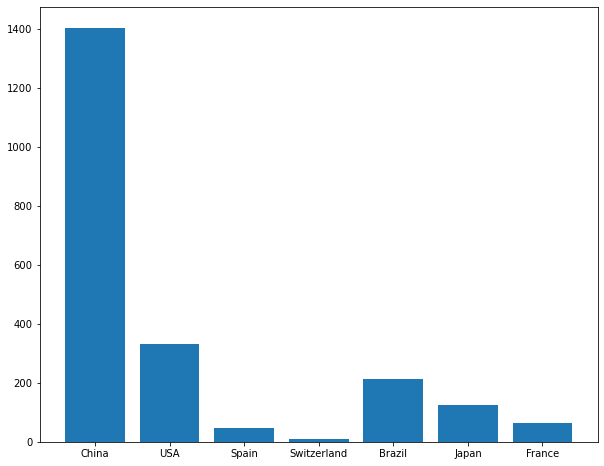

In [22]:
# Simple bar chart showing relative population:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.bar(df["name"], df["Population_in_M"])
plt.show()